# Lab 7 - Dynamic Programming - Power Plant

Information on group members:

1) 151950 Eryk Ptaszyński <br>
2) 151942 Filip Firkowski

In [ ]:
%matplotlib inline

from sympy.interactive import printing
printing.init_printing(use_latex=True)

import matplotlib.pyplot as plt
import sympy as sym
from sympy import *
import numpy as np

This exercise is inspired by Ex. 2 in the Exercises.pdf file. You have to set operating levels for a power plant for consecutive two-months in a way that minimizes the operating costs (using dynamic programming). Before going to the exercise, it is recommended to get acquainted with a Python library for symbolic calculations - SymPy, which can be particularly helpful for solving this task.

# Mini tutorial on SymPy

SymPy is a library for performing symbolic calculations instead of numerical. It allows defining symbols, functions, expressions, equations and performing various operations on them. The examples of such operations that can help solve this exercise are given below. Note that due to lines: <br><br>
from sympy.interactive import printing <br>
printing.init_printing(use_latex=True)  <br><br>
located in the first cell of this notebook, the symbols can be printed using latex, improving hence readability

<b> Defining symbols: </b>

In [ ]:
z1, z2 = symbols("z1 z2")
# or z = symbols("z1 z2")

<b> Printing a symbol using Latex: </b>

In [ ]:
z1

z₁

<b> Defining an expression: </b>

In [ ]:
2*z1 + (10-z2)**2

                2
2⋅z₁ + (10 - z₂) 

<b>Expanding the expression:</b>

In [ ]:
expand(2*z1 + (10-z2)**2)

         2              
2⋅z₁ + z₂  - 20⋅z₂ + 100

<b> Simplifying the expression:</b>

In [ ]:
e = simplify(expand(2*z1 + (10-z2)**2 - (5+z1)**2))
e

    2            2             
- z₁  - 8⋅z₁ + z₂  - 20⋅z₂ + 75

<b> Substituting a variable with a value in the expression:</b>

In [ ]:
e = 2*z1 + (10-z1)**2
v = e.evalf(subs={z1: 10})
print(v)

20.0000000000000


<b> Substituting a variable with another variable or value:</b>

In [ ]:
e = 2*z1 + (10-z2)**2
e.subs(z2, z1)

                2
2⋅z₁ + (10 - z₁) 

<b> Finding a (partial) derivative: </b>

In [ ]:
e = 2*z1 + (10-z2)**2
d = diff(e, z2)
d

2⋅z₂ - 20

<b> Solving an equation: </b>

In [ ]:
e = 2*z1 + (10-z2)**2
d = diff(e, z2)
v = solve(Eq(d, 0), z2)
print(v)

[10]


# Exercise

Below given is the data. In contrast to the exercise shown in the Exercise.pdf file, note that all pairs of all 12 months are considered stages in this notebook.

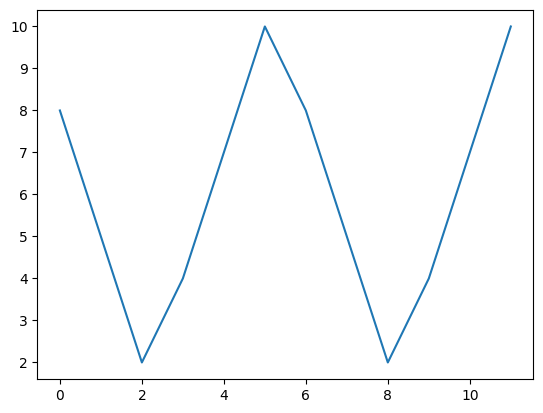

In [ ]:
MONTHS = ["Jan-Feb", "Mar-Apr", "May-Jun", "Jul-Aug", "Sep-Oct", "Nov-Dec"]

### min requested operating level (1-10) + allowable bounds
REQUEST = [8,5,2,4,7,10]
BOUNDS = [[REQUEST[i], 10] for i in range(6)]

plt.plot([i for i in range(12)], REQUEST + REQUEST, label='linear')
plt.show()

<b> Cost: </b> Working above the required level - cost in a generic form:

In [ ]:
xi, ri, mi1 = symbols("x_i r_i m_{i1}")
cost_above = mi1*(xi-ri)
cost_above #mi1 = multiplicator, #xi = operating level #ri = requirement (lower bound)

m_{i1}⋅(-rᵢ + xᵢ)

You can do c = cost_above.copy() and then c.subs, replacing variables with values (m, p, r) or other variables (r):

In [ ]:
x1 = symbols("x1")
c = cost_above.copy()
c = c.subs(xi, x1)
c = c.subs(mi1, 1)
c = c.subs(ri, 100)
c

x₁ - 100

Below are provided m parameter values for each month:

In [ ]:
mv1 = [2, 8, 10, 12, 10, 6 ]

<b> Cost: </b> Chaging the operating level - cost in a generic form:

In [ ]:
si, mi2, pi = symbols("s_{i} m_{i2} p_i")
cost_change = mi2*(xi-si)**pi
cost_change #mi2 = multiplicator, #pi = exponent #xi = operating level (i-th month) #s_{i} = state: operating level ((i-1)-th month)
cost_change

                    pᵢ
m_{i2}⋅(-s_{i} + xᵢ)  

Below are provided m and p parameter values for each month:

In [ ]:
mv2 = [6, 4, 1, 1, 3, 5]
pv = [2, 2, 2, 2, 2, 2]

# Solution:

Apart from finding optimal operating levels for each month, plot these values along with the lower bounds for each month in order to show how they change in time.<br><br>Hints:<br>
- the optimal cost = 135.42<br>
- there is no situation when the minima for first derivatives are outside allowable bounds (but test it anyway)<br><br>

After obtaining and plotting the solution, check what would happen is you change the mv1[2] parameter to 5.

In [ ]:
si, mi2, pi = symbols("s_{i} m_{i2} p_i")
cost_change = mi2*(xi-si)**pi
cost_change
cost_change

                    pᵢ
m_{i2}⋅(-s_{i} + xᵢ)  

In [ ]:
xi, ri, mi1 = symbols("x_i r_i m_{i1}")
cost_above = mi1*(xi-ri)
cost_above

m_{i1}⋅(-rᵢ + xᵢ)

In [ ]:
MONTHS = ["Jan-Feb", "Mar-Apr", "May-Jun", "Jul-Aug", "Sep-Oct", "Nov-Dec"]
REQUEST, MV1, MV2, PV = [8,5,2,4,7,10], [2,8,10,12,10,6], [6,4,1,1,3,5], [2,2,2,2,2,2]
BOUNDS = [(request, 10) for request in REQUEST]

def getCostAbove(index, x):
    return MV1[index] * (x - REQUEST[index])

def getCostChange(index, x, previous):
    return MV2[index] * (x - previous) ** PV[index]

def exchangeSandX(variable):
    if variable.name.startswith('x'):
        return symbols(f"s_{int(variable.name[2:]) + 1}")
    elif variable.name.startswith('s'):
        return symbols(f"x_{int(variable.name[2:]) - 1 if int(variable.name[2:]) else len(REQUEST) - 1}")

def calculateBoundaryValues(index, equation):
    var = next(iter(equation.free_symbols))
    return solve(Eq(equation, BOUNDS[index][0]), var)

In [ ]:
from sympy import symbols, diff, solve, Piecewise, nan

def calculate_optimal_costs():
    currX = startingPoint = len(REQUEST) - 1
    calculatedXes, optimalCosts = {}, {len(REQUEST): 0}

    while f"x_{currX}" not in calculatedXes:
        variable, state = symbols(f"x_{currX} s_{currX}")
        objectiveFunction = getCostChange(currX, variable, state) + getCostAbove(currX, variable) + optimalCosts[currX + 1]

        if BOUNDS[currX][0] == BOUNDS[currX][1]:
            calculatedXes[variable] = BOUNDS[currX][0]
            objectiveFunction = objectiveFunction.subs(variable, BOUNDS[currX][0])
            optimalCosts[currX] = objectiveFunction.subs(state, exchangeSandX(state))
        else:
            derObjectiveFunction = diff(objectiveFunction, variable)
            solution = solve(Eq(derObjectiveFunction, 0), variable)[0]
            testLowerBound = solution.subs(state, BOUNDS[currX-1][0])

            if currX == 0:
                solution = solve(Eq(derObjectiveFunction, 0), variable)[0]
                if isinstance(solution, Piecewise):
                    filtered_conditions = [(expr, cond) if not expr.has(nan) else (expr.subs(nan, 0), cond) for expr, cond in solution.args ]
                    solution = Piecewise(*filtered_conditions)
                calculatedXes[variable] = solution
                optimalCosts[currX] = objectiveFunction.subs(variable, solution).subs(state, exchangeSandX(state))
                break

            testUpperBound = solution.subs(state, BOUNDS[currX-1][1])

            if testLowerBound > BOUNDS[currX][0] and testUpperBound < BOUNDS[currX][1]:
                objectiveFunction = objectiveFunction.subs(variable, solution)
                optimalCosts[currX] = objectiveFunction.subs(state, exchangeSandX(state))
                calculatedXes[variable] = solution
            else:
                lowerBoundary = calculateBoundaryValues(currX, solution)[0]
                piecewise = Piecewise((solution,(BOUNDS[currX][1] >= state) & (state >= lowerBoundary)),
                                  (BOUNDS[currX][0], (BOUNDS[currX-1][0] < state) & (state < lowerBoundary)))

                optimalCosts[currX] = objectiveFunction.subs(variable, piecewise).subs(state, exchangeSandX(state))
                calculatedXes[variable] = piecewise

        currX = (currX - 1) % len(REQUEST)

    return calculatedXes, optimalCosts

def update_calculatedXes(calculatedXes):
    for key, value in reversed(calculatedXes.items()):
        try:
            variable = value.free_symbols.pop()
            calculatedX = calculatedXes[exchangeSandX(variable)]
            calculatedXes[key] = value.subs(variable, calculatedX)
        except Exception as e:
            break
    return calculatedXes

calculatedXes, optimalCosts = calculate_optimal_costs()
calculatedXes = update_calculatedXes(calculatedXes)

print([(x ,float(val)) for x, val in reversed(calculatedXes.items())])
print("Optimal cost:", float(optimalCosts[0].subs(calculatedXes)))

⎧    167⋅s₀   887       152⋅s₁   180      23⋅s₂   14      8⋅s₃   87      3⋅s₄ 
⎨x₀: ────── - ────, x₁: ────── - ───, x₂: ───── - ──, x₃: ──── + ──, x₄: ──── 
⎩     177     1062       167     167        38    19       23    23       8   

  45        ⎫
+ ──, x₅: 10⎬
  8         ⎭

[(x_0, 8.599811676082863), (x_1, 6.749529190207157), (x_2, 3.3483992467043313), (x_3, 4.947269303201507), (x_4, 7.480225988700565), (x_5, 10.0)]
Optimal cost: 135.424670433145


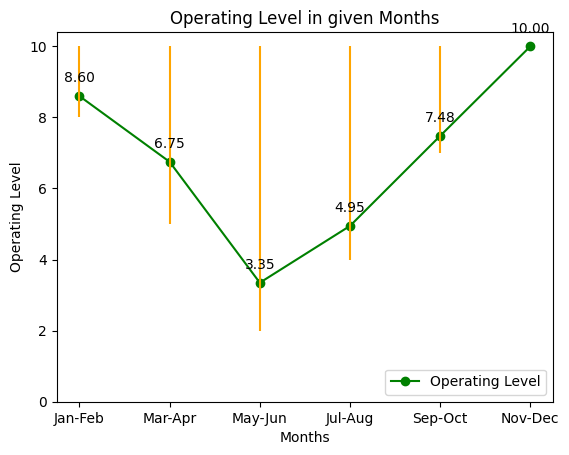

In [ ]:
x_values = MONTHS
y_values = [float(calculatedXes[symbols(f'x_{i}')]) for i in range(len(MONTHS))]

fig, ax = plt.subplots()
ax.plot(x_values, y_values, marker='o', linestyle='-', color='green', label='Operating Level')

for i in range(len(MONTHS)):
    lower_bound = BOUNDS[i][0]
    upper_bound = BOUNDS[i][1]
    ax.vlines(x_values[i], lower_bound, upper_bound, colors='orange', linestyles='solid')
    ax.hlines([lower_bound, upper_bound], x_values[i], x_values[i], colors='red')
    ax.annotate(f'{y_values[i]:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xlabel('Months')
ax.set_ylabel('Operating Level')
ax.set_ylim(bottom=0)
ax.set_title('Operating Level in given Months')
ax.legend(loc='lower right')
plt.show()